# Logistic Regression on Titanic Dataset
# This notebook predicts survival using logistic regression,
# with proper preprocessing, pipeline, evaluation metrics, and cross-validation.


In [94]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')


In [95]:
# 2. Load Dataset
titanic = pd.read_csv(r"/content/Titanic_train.csv")  # Ensure this file is in your working directory
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
titanic.shape,titanic.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [97]:
# The Titanic_train.csv file contains information about passengers on the Titanic, including their survival status, passenger class, name, gender, age, family size, ticket information, fare, cabin number, and port of embarkation.

# This data can be used to analyze factors that influenced survival on the Titanic, such as passenger class, age, and gender.

In [98]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
# Name, Sex, Ticket, Cabin and Embarked columns contains Object(String or character data)
# Remaining columns are integer columns except Fare and Age. Those are contains float values

In [100]:
titanic.isnull().mean() * 100 #find the % of missing values

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [101]:
# Age and Cabin columns contains missing values
# Cabin column cintains the highest no of missing values

In [102]:
titanic = titanic.drop(columns=['PassengerId','Name','Ticket','Cabin']) #removing columns because those are not useful in model building
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [103]:
titanic.describe() #Get statistical information about the data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# The minimum age of a passenger is 0.42 means a newly born baby
# The maximum age of a passenger is 80 and median of age is 28 and mean is 29.699. That means the max no of passengers belongs to 28 to 30.
# The minimum fare of a ticket is 0 and max is 512.


In [105]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True) #Imputing age column missing values with mean
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [106]:
titanic['Embarked'].isnull().sum()

np.int64(2)

In [107]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [108]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [109]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [110]:
titanic['Survived'].value_counts() #Finding unique values in the column and their respective count

,count
Survived,
0,549
1,342


In [111]:
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [112]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [113]:
titanic['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [114]:
titanic['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [115]:
data = titanic['Survived'].value_counts().reset_index()
data

,Survived,count
0,0,549
1,1,342


In [116]:
data = titanic['Survived'].value_counts().reset_index() #Ploting bar plot for categorical columns
fig = px.bar(data,x='Survived',y='count',template='plotly_dark',text_auto=True,color='Survived')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Survived Column',
                 title_x=0.5,
                 xaxis_title='Survived',
                 yaxis_title='Frequency Count')
fig.show()


In [117]:
data = titanic['Pclass'].value_counts().reset_index()
fig = px.bar(data,x='Pclass',y='count',template='plotly_dark',text_auto=True,color='Pclass')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Pclass Column',
                 title_x=0.5,
                 xaxis_title='Pclass',
                 yaxis_title='Frequency Count')
fig.show()

In [118]:
data = titanic['Sex'].value_counts().reset_index()
fig = px.bar(data,x='Sex',y='count',template='plotly_dark',text_auto=True,color='Sex')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Sex Column',
                 title_x=0.5,
                 xaxis_title='Sex',
                 yaxis_title='Frequency Count')
fig.show()

In [119]:
data = titanic['SibSp'].value_counts().reset_index()
fig = px.bar(data,x='SibSp',y='count',template='plotly_dark',text_auto=True,color='SibSp')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for SibSp Column',
                 title_x=0.5,
                 xaxis_title='SibSp',
                 yaxis_title='Frequency Count')
fig.show()

In [120]:
data = titanic['Parch'].value_counts().reset_index()
fig = px.bar(data,x='Parch',y='count',template='plotly_dark',text_auto=True,color='Parch')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Parch Column',
                 title_x=0.5,
                 xaxis_title='Parch',
                 yaxis_title='Frequency Count')
fig.show()

In [121]:
data = titanic['Embarked'].value_counts().reset_index()
fig = px.bar(data,x='Embarked',y='count',template='plotly_dark',text_auto=True,color='Embarked')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Embarked Column',
                 title_x=0.5,
                 xaxis_title='Embarked',
                 yaxis_title='Frequency Count')
fig.show()

In [122]:
fig = px.histogram(titanic,x='Age',nbins=15,template='plotly_dark',text_auto=True) #Ploting hostogram for continues variables
fig.update_traces(marker_line_width=1.2,marker_line_color='white')
fig.update_layout(title='Distribution of Age',
                 title_x=0.5)
fig.show()

In [123]:
fig = px.histogram(titanic,x='Fare',nbins=15,template='plotly_dark',text_auto=True)
fig.update_traces(marker_line_width=1.2,marker_line_color='white')
fig.update_layout(title='Distribution of Fare',
                 title_x=0.5)
fig.show()

In [124]:
from sklearn.preprocessing import LabelEncoder #Encoding columns which contains string values in their column
label_enc = LabelEncoder()
titanic['Sex'] = label_enc.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_enc.fit_transform(titanic['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [125]:
!pip install klib

In [126]:
import klib #correlation matrix using klib
klib.corr_mat(titanic)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.00,-0.34,-0.54,-0.06,-0.04,0.08,0.26,-0.17
Pclass,-0.34,1.00,0.13,-0.34,0.08,0.02,-0.55,0.16
Sex,-0.54,0.13,1.00,0.08,-0.11,-0.25,-0.18,0.11
Age,-0.06,-0.34,0.08,1.00,-0.23,-0.17,0.10,-0.02
SibSp,-0.04,0.08,-0.11,-0.23,1.00,0.41,0.16,0.07
Parch,0.08,0.02,-0.25,-0.17,0.41,1.00,0.22,0.04
Fare,0.26,-0.55,-0.18,0.10,0.16,0.22,1.00,-0.22
Embarked,-0.17,0.16,0.11,-0.02,0.07,0.04,-0.22,1.00


In [127]:
klib.corr_interactive_plot(titanic).show() #ploting correlation plot using klib

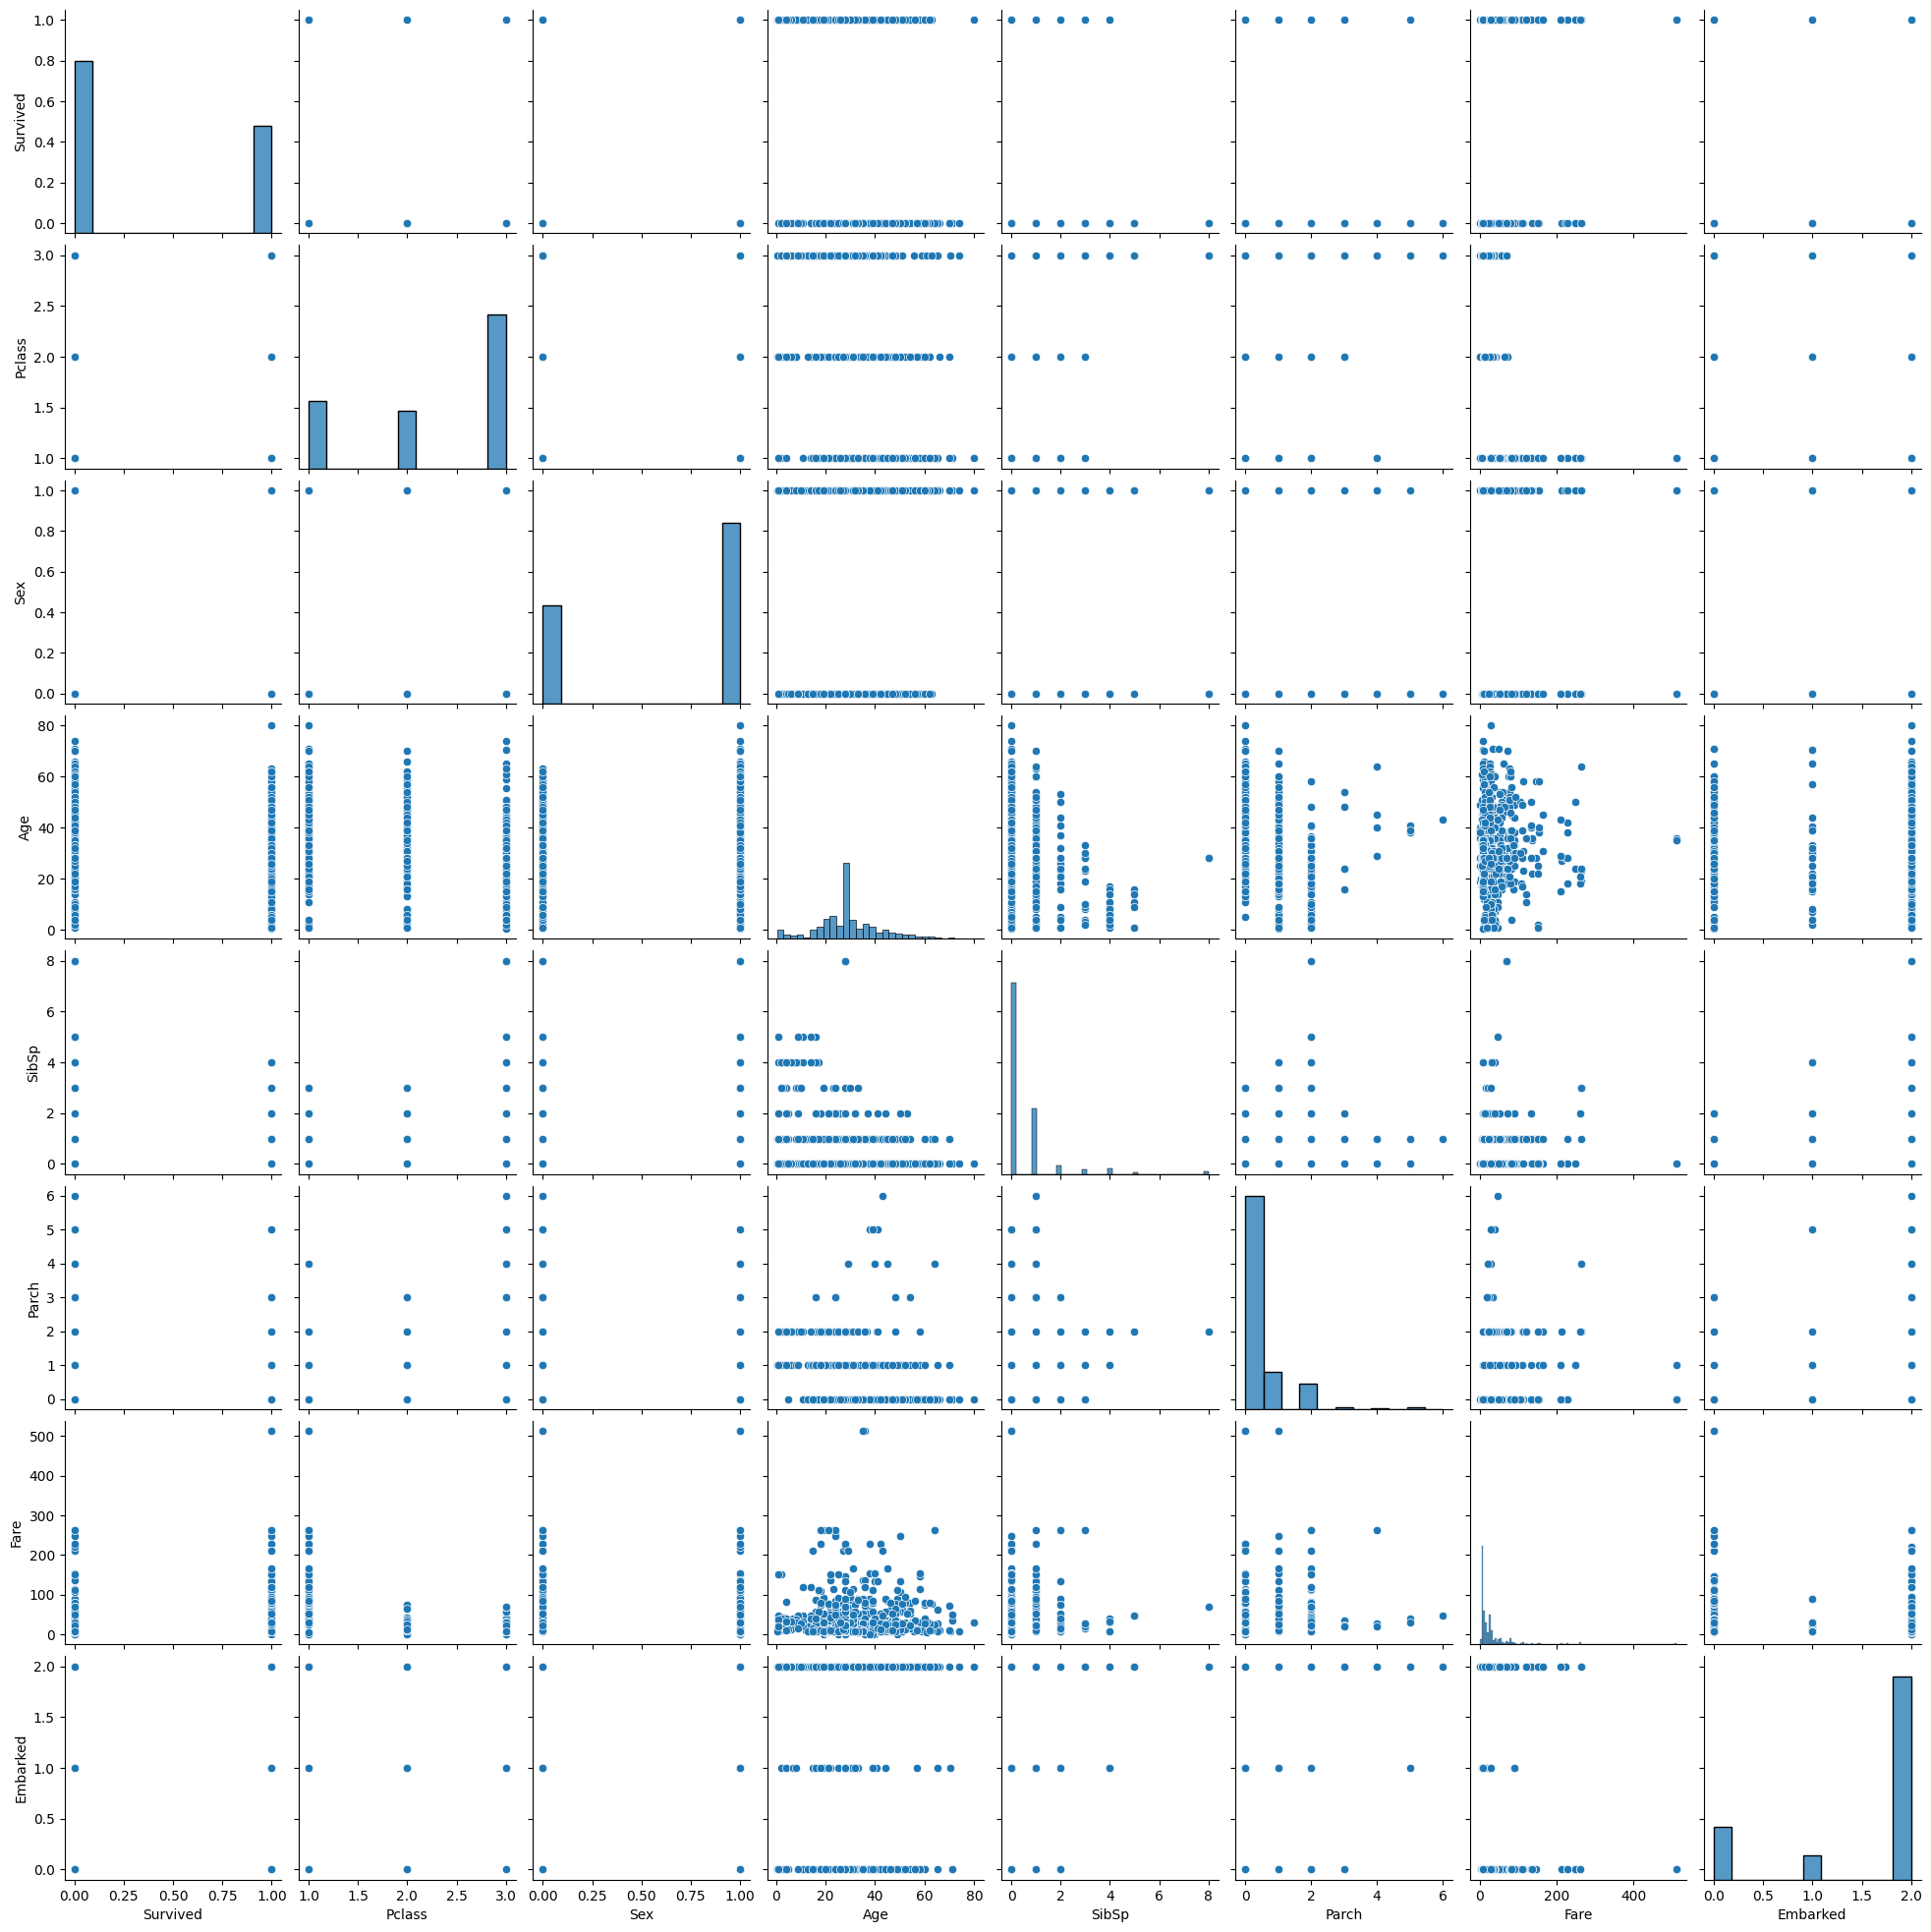

In [128]:
sns.pairplot(titanic)
plt.show()

In [129]:
# max no of columns are categorical columns.
# Age and Fare columns contains continues values.
# There is a noticeable correlation between the Pclass and Fare, indicating that higher classes generally paid more for their tickets.

In [130]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [131]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
print(X.shape,y.shape)

(891, 7) (891,)


In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [133]:
# 7. Feature Scaling
# Scale numerical features ('Age', 'Fare')
numerical_cols = ['Age', 'Fare']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaled X_train:")
display(X_train.head())
print("\nScaled X_test:")
display(X_test.head())

Scaled X_train:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
599,1,1,1.528337,1,0,0.486264,0
830,3,0,-1.100894,1,0,-0.348553,0
306,1,0,-0.095599,0,0,1.546694,0
231,3,1,-0.018269,0,0,-0.479828,2
845,3,1,0.987025,0,0,-0.484251,2



Scaled X_test:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,-0.095599,1,1,-0.332995,0
439,2,1,0.136391,0,0,-0.426270,2
840,3,1,-0.714242,0,0,-0.476880,2
720,2,0,-1.796867,0,1,0.015952,2
39,3,0,-1.178224,1,0,-0.411693,0


In [134]:
# 8. Create a Pipeline
# Create a pipeline that scales the data and then applies logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

print("Pipeline created:")
print(pipeline)

Pipeline created:
Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])


In [135]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [136]:
# 9. Perform Cross-Validation
# Use cross_val_score to evaluate the pipeline
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5) # Using 5 folds for cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.83552632 0.78289474 0.82781457 0.75496689 0.78145695]
Mean cross-validation accuracy: 0.7965318926455212


In [137]:
# 10. Hyperparameter Tuning
# Use GridSearchCV to find the best hyperparameters for the Logistic Regression model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'log_reg__C': 0.01}
Best cross-validation accuracy: 0.8071279191355872


In [138]:
# 11. Evaluate the Tuned Model
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
print("Accuracy of the tuned model on the test set:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report of the tuned model:\n", classification_report(y_test, y_pred_tuned))
print("\nConfusion Matrix of the tuned model:\n", confusion_matrix(y_test, y_pred_tuned))

Accuracy of the tuned model on the test set: 0.8059701492537313

Classification Report of the tuned model:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84        78
           1       0.83      0.68      0.75        56

    accuracy                           0.81       134
   macro avg       0.81      0.79      0.79       134
weighted avg       0.81      0.81      0.80       134


Confusion Matrix of the tuned model:
 [[70  8]
 [18 38]]


In [139]:
# Visualize the Confusion Matrix
import plotly.express as px
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tuned)

px.imshow(cm, text_auto=True, template='plotly_dark')

In [140]:
log_reg.coef_[0]

array([-0.98453776, -2.61382395, -0.40465642, -0.29487688, -0.10404522,
        0.13134532, -0.20820904])

In [141]:
Beta_coef = pd.Series(log_reg.coef_[0])
Beta_coef

,0
0,-0.984538
1,-2.613824
2,-0.404656
3,-0.294877
4,-0.104045
5,0.131345
6,-0.208209


In [142]:
coefficients = pd.DataFrame({'Columns':pd.Series(X.columns),
                             'Coefficients':pd.Series(log_reg.coef_[0])})
coefficients

,Columns,Coefficients
0,Pclass,-0.984538
1,Sex,-2.613824
2,Age,-0.404656
3,SibSp,-0.294877
4,Parch,-0.104045
5,Fare,0.131345
6,Embarked,-0.208209


In [143]:
# A passenger in a higher class (lower number) has 0.99 greater chances of survival compared to those in lower classes.
# A male passenger has 2.61 lesser chances of survival compared to a female.
# With each additional year of age, there is a 0.03 lesser chance of survival.
# A passenger with more siblings or spouses on board has 0.30 lesser chances of survival.
# A passenger with more parents or children on board has 0.11 lesser chances of survival.
# With each unit increase in fare, there is 0.003 more chances of survival.
# A passenger who embarked from certain ports has 0.21 lesser chances of survival.

In [144]:
log_reg.score(X_train,y_train)

0.8005284015852048

In [145]:
log_reg.score(X_test,y_test)

0.8134328358208955

In [146]:
from sklearn.metrics import roc_auc_score, auc
auc = roc_auc_score(y_test,y_pred)
print("ROC-AUC score :",auc)

ROC-AUC score : 0.8044871794871795


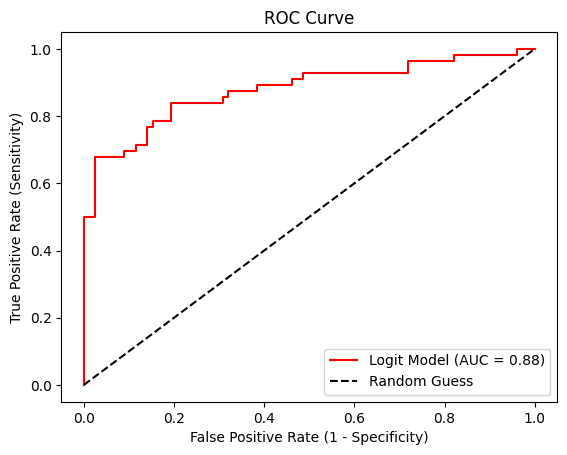

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, color='red', label='Logit Model (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Add labels and legend
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [148]:
#calculates the proportion of survivors in the Titanic dataset
survival_rate = titanic['Survived'].sum() / len(titanic)
survival_rate


np.float64(0.3838383838383838)

In [149]:
print("No of First Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 1)]))
print("No of Second Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 2)]))
print("No of Third Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 3)]))

No of First Class Passengers Who Survived:  136
No of Second Class Passengers Who Survived:  87
No of Third Class Passengers Who Survived:  119


In [150]:
# The overall survival rate was approximately 38.38%.
# Females had a significantly higher survival rate compared to males.
# First-class passengers had the highest survival rate, followed by third-class, and then second-class passengers.

In [151]:
# Coefficients of the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient'])
print("Coefficients of the logistic regression model:")
print(coefficients)

Coefficients of the logistic regression model:
          Coefficient
Pclass      -0.984538
Sex         -2.613824
Age         -0.404656
SibSp       -0.294877
Parch       -0.104045
Fare         0.131345
Embarked    -0.208209


In [152]:
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)

Coefficients: [[-0.98453776 -2.61382395 -0.40465642 -0.29487688 -0.10404522  0.13134532
  -0.20820904]]
Intercept: [3.85882816]


In [153]:
# Discussion of feature significance
# Positive coefficients indicate an increase in the odds of survival with an increase in the corresponding feature,
# while negative coefficients indicate a decrease in the odds of survival.
print("\nSignificance of features in predicting survival probability:")
print("- Features with positive coefficients have a positive impact on survival probability.")
print("- Features with negative coefficients have a negative impact on survival probability.")


Significance of features in predicting survival probability:
- Features with positive coefficients have a positive impact on survival probability.
- Features with negative coefficients have a negative impact on survival probability.


In [154]:
import pickle
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [155]:
##Precision vs. Recall
#Precision and Recall are metrics used in binary classification to evaluate the performance of a model. Here's the difference:

#Precision:

#Definition: Precision measures how many of the predicted positive cases are actually positive. It's a measure of accuracy for the positive predictions.

#Formula:

#Use Case: Useful when the cost of false positives is high. For example, in spam email detection, you want to minimize false positives (non-spam emails incorrectly marked as spam).

#Recall:

#Definition: Recall measures how many actual positive cases were identified correctly by the model. It's a measure of completeness.

#Formula: $$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$$

#Use Case: Useful when the cost of false negatives is high. For example, in disease detection, you want to minimize false negatives (missed diagnoses).

In [156]:
##Cross-validation and its Importance
#Cross-validation is a technique to evaluate the performance of a machine learning model by testing it on multiple subsets of the data. It ensures the model generalizes well to unseen data. Here's an overview:

#What It Is:

#The dataset is split into multiple folds (e.g., 5 or 10).

#The model is trained on k-1 folds and tested on the remaining fold.

#This process is repeated k times, with a different fold used for testing each time.

#The final performance metric is averaged across all folds.

#Why It Is Important in Binary Classification:

#Reduces Overfitting: Instead of relying on a single train-test split, cross-validation ensures the model is tested on multiple subsets of data, providing a robust estimate of its performance.

#Improves Generalization: Helps to detect whether the model performs consistently across varying subsets, ensuring it generalizes well to unseen data.

#Evaluates Bias and Variance: Provides insights into whether the model is underfitting (high bias) or overfitting (high variance).

#Handles Class Imbalances: Especially in binary classification, cross-validation ensures that both classes are represented across different folds, improving model reliability.